# Tugas Besar Komputasi Lunak Neuro-Fuzzy
# Rizky Akhmad Fahreza - 24060121130081

## Persiapan Awal

### Pengaturan environment

In [ ]:
!pip install tensorflow==2.8.0
!pip install pandas numpy matplotlib scikit-learn
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

### Mengunduh library ANFIS dari GitHub

In [ ]:
!git clone https://github.com/gregorLen/AnfisTensorflow2.0.git

Cloning into 'AnfisTensorflow2.0'...
remote: Enumerating objects: 3029, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3029 (delta 19), reused 15 (delta 15), pack-reused 3004 (from 1)
Receiving objects: 100% (3029/3029), 9.44 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (550/550), done.


In [ ]:
import sys
sys.path.append('/content/AnfisTensorflow2.0')

### Memuat library lain yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import sys
sys.maxsize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score ,accuracy_score, f1_score, recall_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.optimizers import Adam

### Memuat dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Mengambil dataset heart disease
heart_disease = fetch_ucirepo(id=45)

# Mengonversi fitur dan target menjadi DataFrame
X = heart_disease.data.features
y = heart_disease.data.targets

# Menggabungkan X dan y menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# Menampilkan 5 baris pertama dari DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Pemahaman Data

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Memeriksa informasi dataset
print("Info dataset:")
df.info()

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
# Memeriksa apakah ada nilai kosong
print("Jumlah nilai kosong di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai kosong di setiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## Preprocessing Data

In [ ]:
df2 = df.copy()

### 1. Mengganti nama kolom num menjadi target dan membuat nilai kolom hanya menjadi:
0: Tidak ada indikasi, 1: Terdapat indikasi

In [ ]:
# Mengubah nama kolom 'num' menjadi 'target'
df2.rename(columns={'num': 'target'}, inplace=True)

# Mengganti nilai target 1, 2, 3, 4 menjadi 1
df2['target'] = df2['target'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

# Menampilkan hasil
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### 2. Mengisi nilai yang hilang dengan imputasi

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df2[['ca', 'thal']] = imputer.fit_transform(df2[['ca', 'thal']])

print("Jumlah nilai kosong di setiap kolom:")
print(df2.isnull().sum())

Jumlah nilai kosong di setiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 3. Standarisasi fitur untuk normalisasi

In [ ]:
# Pisahkan fitur (X) dan target (y)
features = df2.drop(columns=['target'])  # Semua kolom kecuali target
target = df2['target']  # Kolom target

# Standarisasi fitur untuk normalisasi
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330,0.224080,0.433555
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113,0.310403,0.483318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Seleksi Fitur untuk Mereduksi Dimensi dengan PCA

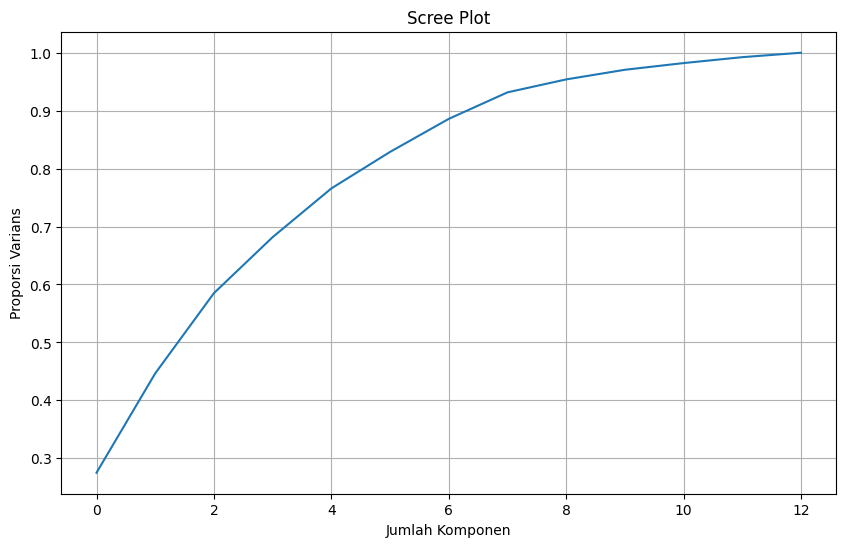

In [ ]:
# Melakukan eksplorasi untuk melihat proporsi varians untuk setiap komponen PC

pca = PCA()
pca.fit(scaled_features)

# Plot varians yang dijelaskan
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Jumlah Komponen')
plt.ylabel('Proporsi Varians')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# pca_features_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
# pca_features_df.head()

In [ ]:
# Reduksi dimensi dengan PCA
n_components = 6 # 6 dipilih karena model pada library ini hanya bisa memroses 2 - 6 input saja
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)


pca_features.shape
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
pca_features_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.295193,0.351389,0.772420,-0.646212,0.478641,-0.925730
1,0.609454,0.626178,-0.209542,0.421933,0.255185,0.612358
2,1.153566,0.347093,-0.099228,0.102105,-0.155843,0.219457
3,-0.317968,-0.464291,0.122678,0.155524,-0.058087,-0.412201
4,-0.836602,0.641732,0.024049,0.047325,-0.186706,-0.210370


## Persiapan dan Pembagian Data Pelatihan

In [ ]:
# Memasukkan data ke variabel
X = pca_features_df[:300]
Y = target[:300]

In [ ]:
X

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.295193,0.351389,0.772420,-0.646212,0.478641,-0.925730
1,0.609454,0.626178,-0.209542,0.421933,0.255185,0.612358
2,1.153566,0.347093,-0.099228,0.102105,-0.155843,0.219457
3,-0.317968,-0.464291,0.122678,0.155524,-0.058087,-0.412201
4,-0.836602,0.641732,0.024049,0.047325,-0.186706,-0.210370
...,...,...,...,...,...,...
295,-0.673690,-0.601270,0.383950,0.380567,0.104560,-0.046365
296,0.566217,0.415827,0.512243,-0.731420,0.470939,0.254544
297,0.390575,-0.293219,-1.073055,-0.157426,-0.231353,-0.299748
298,0.046072,-0.763052,0.434461,-0.216612,-0.301810,-0.598325


In [ ]:
Y

,target
0,0
1,1
2,1
3,0
4,0
...,...
295,0
296,1
297,1
298,1


In [ ]:
# Hitung jumlah nilai 0
count_0 = (Y == 0).sum()

# Hitung jumlah nilai 1
count_1 = (Y == 1).sum()

# Tampilkan hasil
print(f"Jumlah nilai 0: {count_0}")
print(f"Jumlah nilai 1: {count_1}")

Jumlah nilai 0: 163
Jumlah nilai 1: 137


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Membagi dataset menjadi train (70%) dan temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42, stratify=Y)

# 2. Membagi temp (30%) menjadi validation (20%) dan test (10%)
# Note: test_size=2/3 * 0.3 = 0.2 untuk mendapatkan 20% dari data awal.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, shuffle=True, random_state=42, stratify=y_temp)

# Verifikasi bentuk data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_val:", X_val.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_val:", y_val.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (210, 6)
Ukuran X_val: (60, 6)
Ukuran X_test: (30, 6)
Ukuran y_train: (210,)
Ukuran y_val: (60,)
Ukuran y_test: (30,)


## Membangun Model

### Import library model anfis

In [ ]:
from Models import myanfis

### Hyperparameter Tuning dengan Grid Search untuk n_memb dan memb_func

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fungsi untuk menjalankan eksplorasi parameter
def grid_search(X, Y, n_memb_options, memb_func_options, n_trials=10):

    # Simpan hasil seluruh percobaan
    all_results = []

    for trial in range(n_trials):
        trial_results = []

        # Membagi dataset menjadi train (70%), validation (20%), test (10%)
        X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42, stratify=Y)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, shuffle=True, random_state=42, stratify=y_temp)

        for n_memb in n_memb_options:
            for memb_func in memb_func_options:
                try:
                    # Set parameter untuk ANFIS
                    parameter = myanfis.fis_parameters(
                        n_input=6,
                        n_memb=n_memb,
                        batch_size=10,
                        memb_func=memb_func,
                        optimizer=Adam(learning_rate=0.001),
                        loss='binary_focal_crossentropy',
                        n_epochs=100
                    )

                    # Membuat model ANFIS
                    fis = myanfis.ANFIS(
                        n_input=parameter.n_input,
                        n_memb=parameter.n_memb,
                        batch_size=parameter.batch_size,
                        memb_func=parameter.memb_func,
                        name=f"model_trial_{trial}_n_memb_{n_memb}_{memb_func}"
                    )

                    # Compile model
                    fis.model.compile(
                        optimizer=parameter.optimizer,
                        loss=parameter.loss,
                        metrics=["accuracy"]
                    )

                    # Latih model
                    history = fis.model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=10,
                        verbose=0
                    )

                    # Prediksi pada test set
                    y_pred = (fis(X_test) > 0.5).astype(int)

                    # Hitung akurasi
                    test_accuracy = accuracy_score(y_test, y_pred)

                    # Simpan hasil
                    trial_results.append({
                        'trial': trial,
                        'n_memb': n_memb,
                        'memb_func': memb_func,
                        'test_accuracy': test_accuracy
                    })

                except Exception as e:
                    print(f"Error in trial {trial}, n_memb={n_memb}, memb_func={memb_func}: {e}")

        all_results.extend(trial_results)

    return all_results

# Fungsi untuk visualisasi hasil grid search
def visualize_results_multiple(results, n_memb_options, memb_func_options):
    plt.figure(figsize=(12, 8))

    colors = {"gaussian": "blue", "gbellmf": "red", "sigmoid" : "green"}  # Tetapkan warna untuk tiap memb_func

    for memb_func in memb_func_options:
        # Pisahkan hasil berdasarkan fungsi keanggotaan
        memb_func_results = [r for r in results if r['memb_func'] == memb_func]

        # Simpan nilai test accuracy untuk setiap n_memb
        accuracy_by_n_memb = {n: [] for n in n_memb_options}

        for r in memb_func_results:
            accuracy_by_n_memb[r['n_memb']].append(r['test_accuracy'])

        # Hitung mean dan plot titik-titik
        mean_accuracies = []
        for n_memb in n_memb_options:
            accuracies = accuracy_by_n_memb[n_memb]
            mean_accuracy = np.mean(accuracies)
            mean_accuracies.append(mean_accuracy)

            # Plot titik-titik untuk setiap hasil
            plt.scatter(
                [n_memb] * len(accuracies),
                accuracies,
                alpha=0.6,
                color=colors[memb_func],  # Gunakan warna tetap berdasarkan memb_func
                label=f'{memb_func} (points)' if n_memb == n_memb_options[0] else ""
            )

        # Plot garis rata-rata
        plt.plot(
            n_memb_options,
            mean_accuracies,
            marker='o',
            color=colors[memb_func],  # Gunakan warna tetap berdasarkan memb_func
            label=f'{memb_func} (mean)',
            linewidth=2
        )

    plt.title('Test Accuracy per Number of Membership Functions (n_memb)', fontsize=14)
    plt.xlabel('Number of Membership Functions (n_memb)', fontsize=12)
    plt.xticks(n_memb_options)  # Hanya menampilkan label integer pada n_memb
    plt.ylabel('Test Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

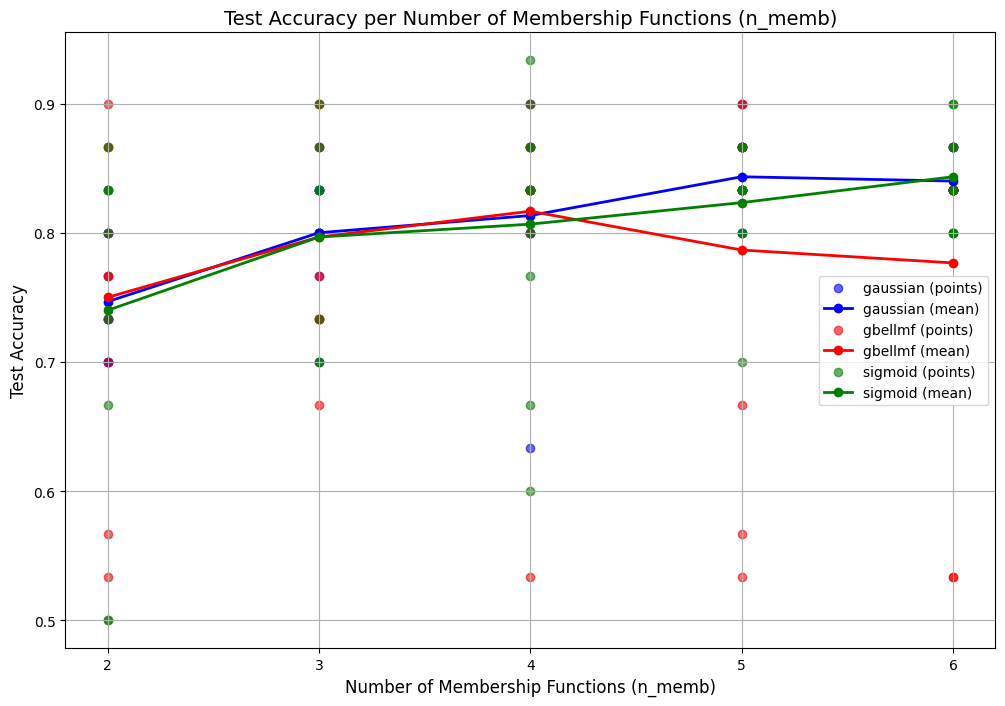

In [ ]:
# Contoh penggunaan

# Parameter yang akan dicoba
n_memb_options = [2, 3, 4, 5, 6]
memb_func_options = ['gaussian', 'gbellmf', 'sigmoid']

# Hasil eksplorasi
results = grid_search(X, Y, n_memb_options, memb_func_options, n_trials=10)

# Visualisasi
visualize_results_multiple(results, n_memb_options, memb_func_options)

### Set parameter untuk model berdasarkan hasil eksplorasi

In [ ]:
# Set parameter untuk ANFIS
parameter = myanfis.fis_parameters(
    n_input=6,
    n_memb=5,
    batch_size=10,
    memb_func='gaussian',
    optimizer=Adam(learning_rate=0.001),
    loss= 'binary_focal_crossentropy',
    n_epochs= 100)

### Membuat model

In [ ]:
# Membuat model ANFIS
fis = myanfis.ANFIS(
    n_input=parameter.n_input,
    n_memb=parameter.n_memb,
    batch_size=parameter.batch_size,
    memb_func=parameter.memb_func,
    name='heart_disease_presence'
)

# Compile model
fis.model.compile(
    optimizer=parameter.optimizer,
    loss=parameter.loss,
    metrics=['accuracy'])

fis.model.summary()

Model: "heart_disease_presence"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputLayer (InputLayer)        [(10, 6)]            0           []                               
                                                                                                  
 fuzzyLayer (FuzzyLayer)        (10, 5, 6)           60          ['inputLayer[0][0]']             
                                                                                                  
 ruleLayer (RuleLayer)          (10, 15625)          0           ['fuzzyLayer[0][0]']             
                                                                                                  
 normLayer (NormLayer)          (10, 15625)          0           ['ruleLayer[0][0]']              
                                                                             

## Pelatihan Model

In [ ]:
# Melatih model
history = fis.fit(
    X_train, y_train,
    epochs=parameter.n_epochs,
    batch_size=parameter.batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/100
21/21 [==============================] - 6s 56ms/step - loss: 4.9219 - accuracy: 0.5429 - val_loss: 5.1921 - val_accuracy: 0.5500
Epoch 2/100
21/21 [==============================] - 0s 19ms/step - loss: 2.9305 - accuracy: 0.5429 - val_loss: 3.4177 - val_accuracy: 0.5500
Epoch 3/100
21/21 [==============================] - 1s 26ms/step - loss: 2.2547 - accuracy: 0.5429 - val_loss: 2.9890 - val_accuracy: 0.5500
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 1.7129 - accuracy: 0.5429 - val_loss: 2.6413 - val_accuracy: 0.5500
Epoch 5/100
21/21 [==============================] - 0s 22ms/step - loss: 1.2614 - accuracy: 0.5429 - val_loss: 1.6725 - val_accuracy: 0.5500
Epoch 6/100
21/21 [==============================] - 0s 17ms/step - loss: 1.0306 - accuracy: 0.5429 - val_loss: 1.3356 - val_accuracy: 0.5500
Epoch 7/100
21/21 [==============================] - 0s 19ms/step - loss: 0.9318 - accuracy: 0.5429 - val_loss: 1.0770 - val_accuracy: 0.5500
Epoch 

## Evaluasi dan Analisa Model

### Analisa

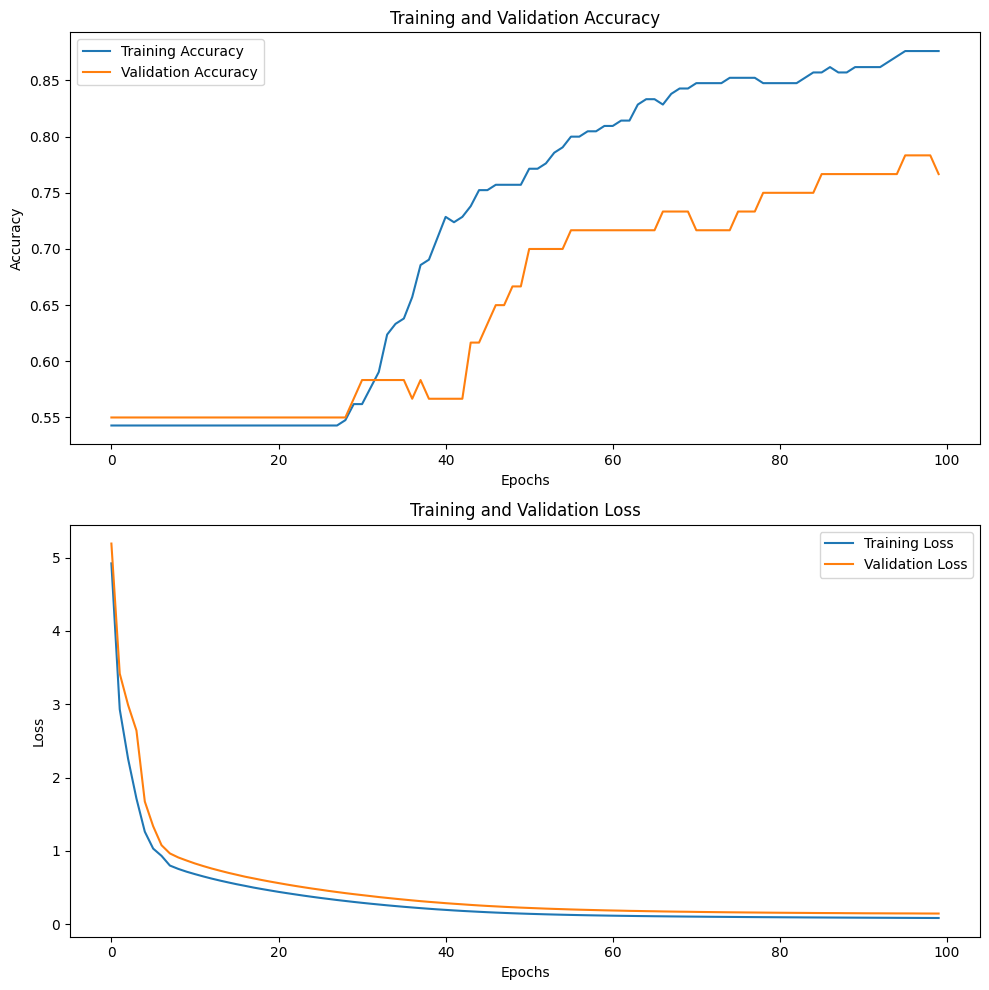

In [ ]:
# Menampilkan grafik akurasi dan loss selama training
plt.figure(figsize=(10, 10))

# Grafik akurasi
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Fungsi Membership

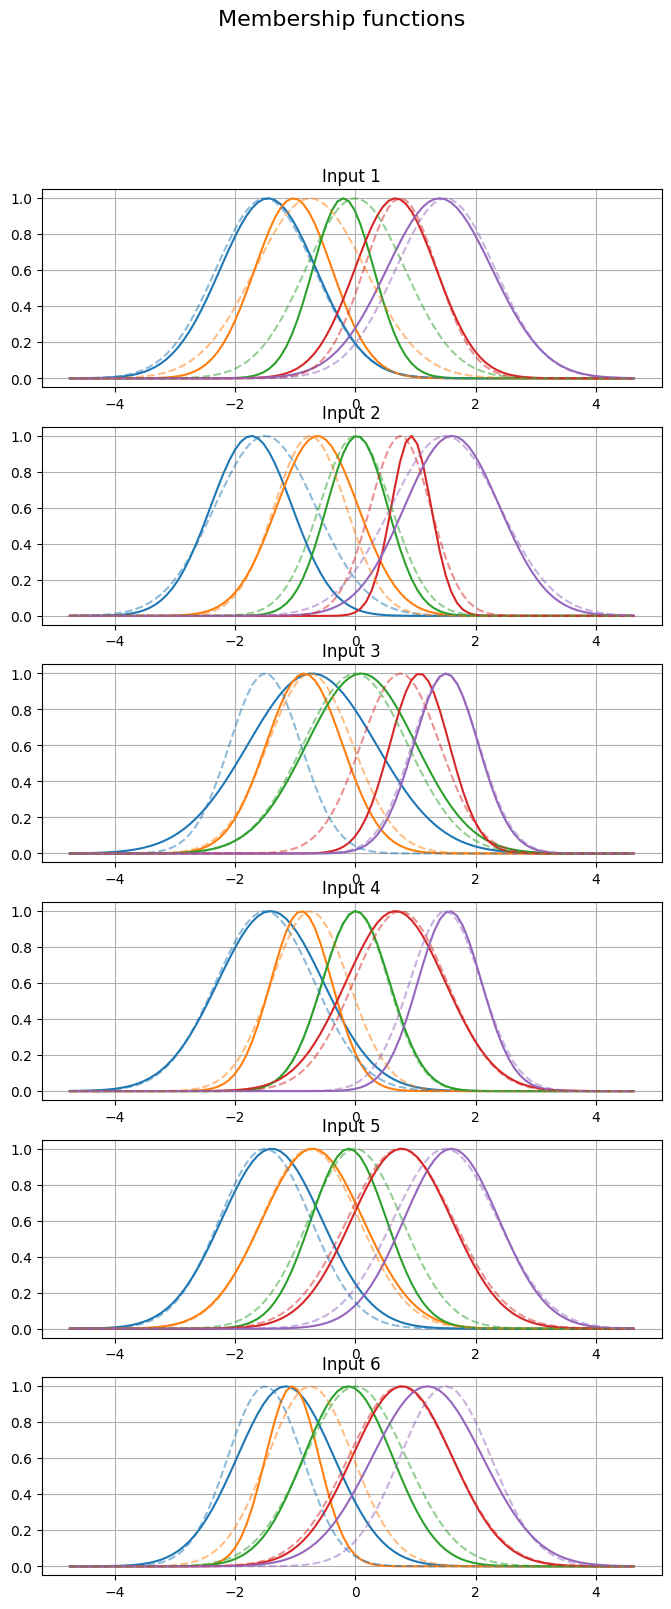

In [ ]:
fis.plotmfs(show_initial_weights=True)

### Evaluasi

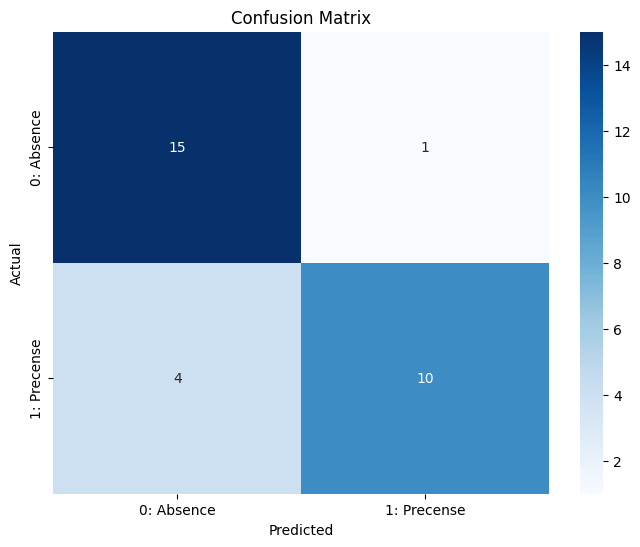

Classification Report:
               precision    recall  f1-score   support

  0: Absence       0.79      0.94      0.86        16
 1: Precense       0.91      0.71      0.80        14

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

Accuracy Score: 0.8333333333333334
Precision: 0.9090909090909091
Recall: 0.7142857142857143
F1-Score: 0.8


In [ ]:
# Prediksi pada data test
y_pred = fis(X_test)
# Ubah probabilitas menjadi label kelas (misalnya, threshold 0.5 untuk klasifikasi biner)
y_pred_labels = (y_pred > 0.5).astype(int)

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0: Absence', '1: Precense'], yticklabels=['0: Absence', '1: Precense'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report
report = classification_report(y_test, y_pred_labels, target_names=['0: Absence', '1: Precense'])
print('Classification Report:\n', report)

# Menghitung dan menampilkan metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print('Accuracy Score:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)